In [ ]:
data = pd.read_csv('beer-servings.csv', index_col=False)
print(data)

     Unnamed: 0      country  beer_servings  spirit_servings  wine_servings  \
0             0  Afghanistan            0.0              0.0            0.0   
1             1      Albania           89.0            132.0           54.0   
2             2      Algeria           25.0              0.0           14.0   
3             3      Andorra          245.0            138.0          312.0   
4             4       Angola          217.0             57.0           45.0   
..          ...          ...            ...              ...            ...   
188         188    Venezuela            NaN            100.0            3.0   
189         189      Vietnam          111.0              2.0            1.0   
190         190        Yemen            6.0              0.0            0.0   
191         191       Zambia           32.0             19.0            4.0   
192         192     Zimbabwe           64.0             18.0            4.0   

     total_litres_of_pure_alcohol      continent  


In [ ]:
data.shape

(193, 7)

In [ ]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [ ]:
data = data.iloc[:, 1:]

In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(0)

In [ ]:
data = data[~duplicated_rows]

In [ ]:
data.shape

(193, 6)

In [ ]:
data.isna()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
188,False,True,False,False,False,False
189,False,False,False,False,False,False
190,False,False,False,False,False,False
191,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


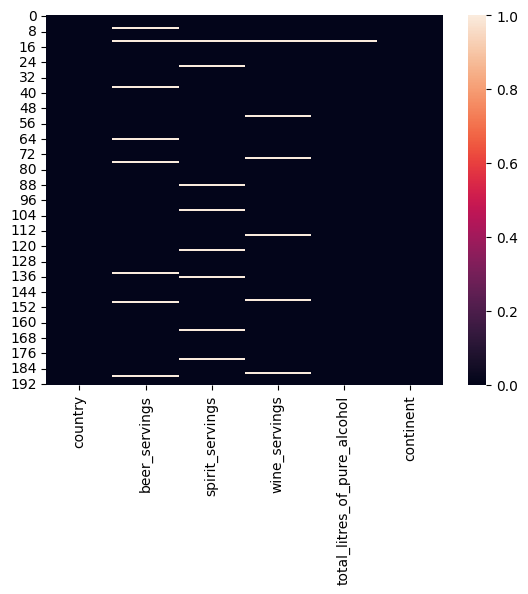

In [ ]:
sns.heatmap(data.isna())
plt.show()

In [ ]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [ ]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
Categorical columns are
['country', 'continent']


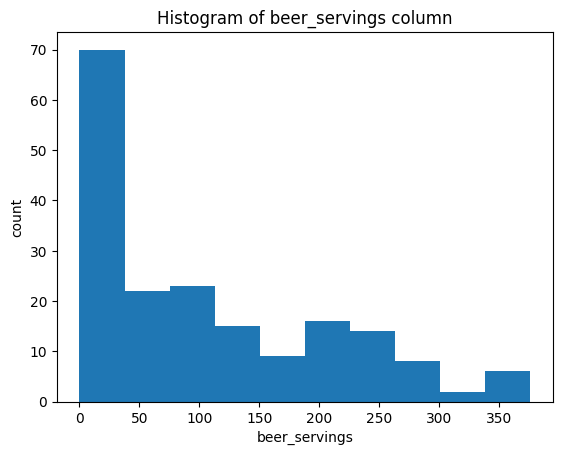

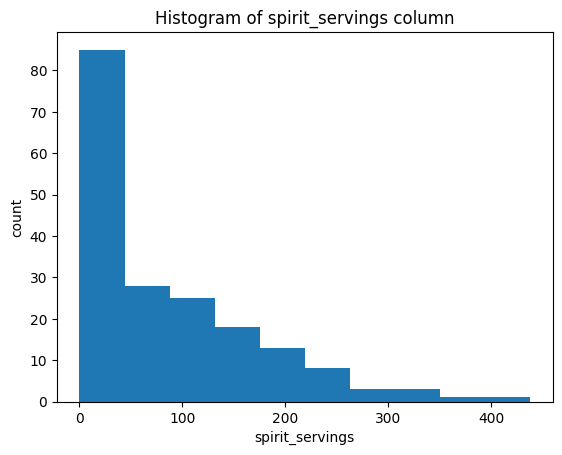

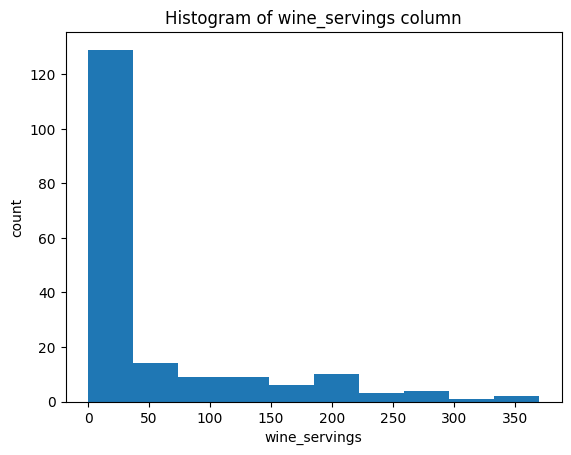

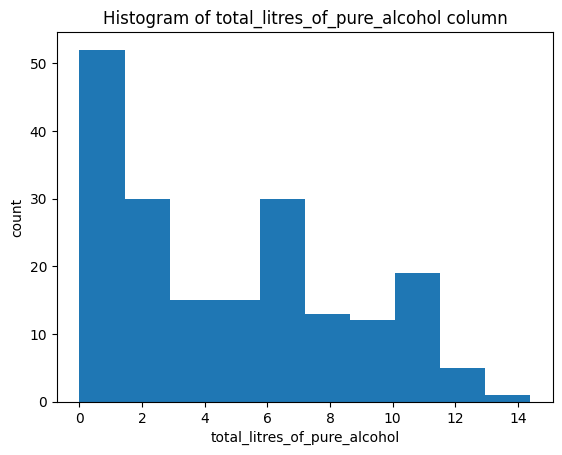

In [ ]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [ ]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [ ]:
num_df.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [ ]:
for col in cat_cols:
    print(cat_df[col].mode())

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object
0    Africa
Name: continent, dtype: object


In [ ]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [ ]:
cat_df.isna().sum()

,0
country,0
continent,0


In [ ]:
data = pd.concat([num_df, cat_df], axis = 1)

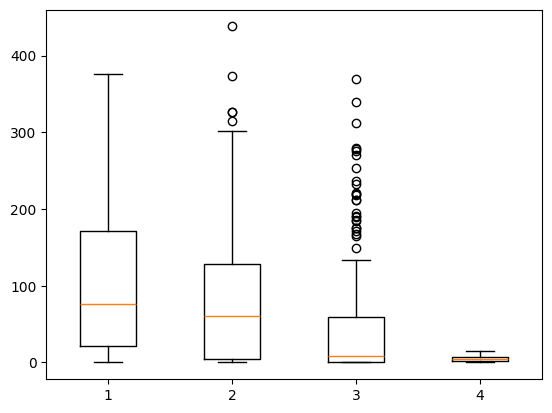

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
def remove_outliers(df,column_name):
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df[column_name] = df[column_name].clip(upper=upper_bound)
        df[column_name] = df[column_name].clip(lower=lower_bound)
        return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

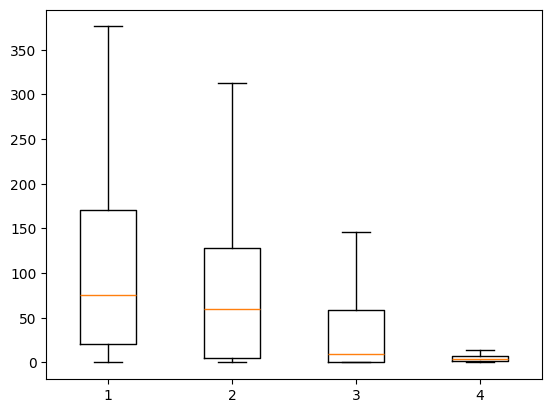

In [ ]:
plt.boxplot(num_df)
plt.show()

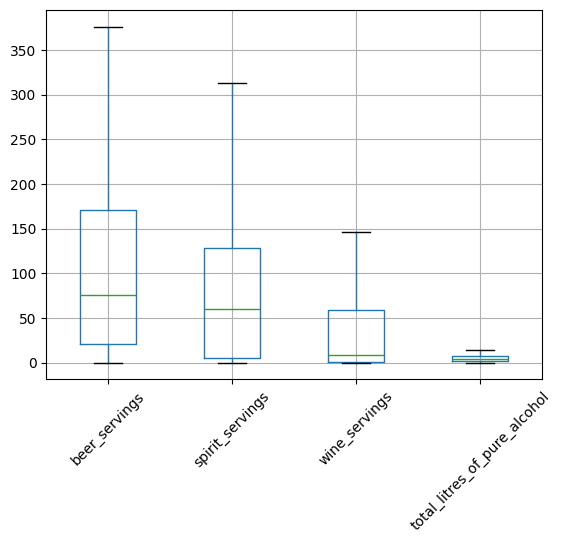

In [ ]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
num_df = min_max_scaler.fit_transform(num_df)

In [ ]:
num_df = pd.DataFrame(num_df, columns = num_cols)

In [ ]:
for col in cat_cols:
  print(cat_df[col].value_counts())

country
0      1
1      1
2      1
3      1
4      1
      ..
188    1
189    1
190    1
191    1
192    1
Name: count, Length: 193, dtype: int64
continent
0    53
2    45
1    44
3    23
4    16
5    12
Name: count, dtype: int64


In [ ]:
for col in cat_cols:
  encoder = LabelEncoder()
  cat_df[col] = encoder.fit_transform(cat_df[col])

In [ ]:
data = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0.000000,0.0000,0.000000,0.000000,0,1
1,0.236702,0.4224,0.369863,0.340278,1,2
2,0.066489,0.0000,0.095890,0.048611,2,0
3,0.651596,0.4416,1.000000,0.861111,3,2
4,0.577128,0.1824,0.308219,0.409722,4,0
...,...,...,...,...,...,...
188,0.202128,0.3200,0.020548,0.534722,188,5
189,0.295213,0.0064,0.006849,0.138889,189,1
190,0.015957,0.0000,0.000000,0.006944,190,1
191,0.085106,0.0608,0.027397,0.173611,191,0


In [ ]:
y = data["total_litres_of_pure_alcohol"]
x = data.drop("total_litres_of_pure_alcohol", axis = 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,beer_servings,spirit_servings,wine_servings,country,continent
82,0.167553,0.2208,0.061644,81,1
109,0.632979,0.2176,0.034247,109,3
163,0.340426,0.5696,0.047945,164,5
35,0.345745,0.3968,1.000000,34,5
136,0.515957,0.1920,1.000000,138,2
...,...,...,...,...,...
106,0.000000,0.0000,0.000000,106,4
14,0.380319,0.5536,0.246575,14,3
92,0.164894,0.0000,0.842466,91,1
179,0.119681,0.1920,0.000000,181,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

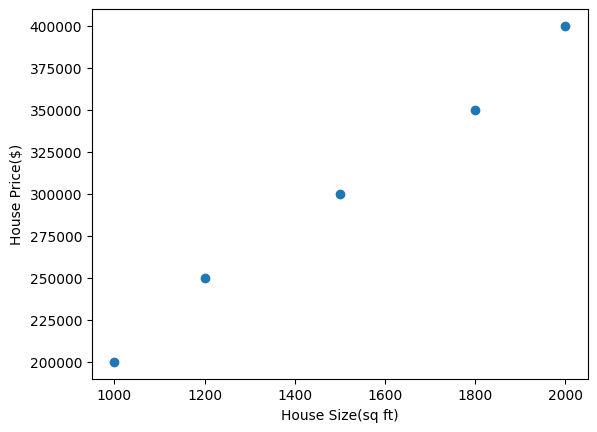

In [ ]:
house_sizes = np.array([1000, 1500, 1200, 2000, 1800])
house_prices = np.array([200000, 300000, 250000, 400000, 350000])
plt.scatter(house_sizes, house_prices, label = "House Data")
plt.xlabel("House Size(sq ft)")
plt.ylabel("House Price($)")
plt.show()

In [ ]:
house_sizes = house_sizes.reshape(-1, 1)
house_prices = house_prices.reshape(-1, 1)
house_sizes.shape
#house_prices.shape
#converted to 2D


(5, 1)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(house_sizes, house_prices)
predicted_prices = lr_model.predict(house_sizes)


In [ ]:
print("Intercept:",lr_model.intercept_)
print("Coefficient:",lr_model.coef_)

Intercept: [13235.29411765]
Coefficient: [[191.17647059]]


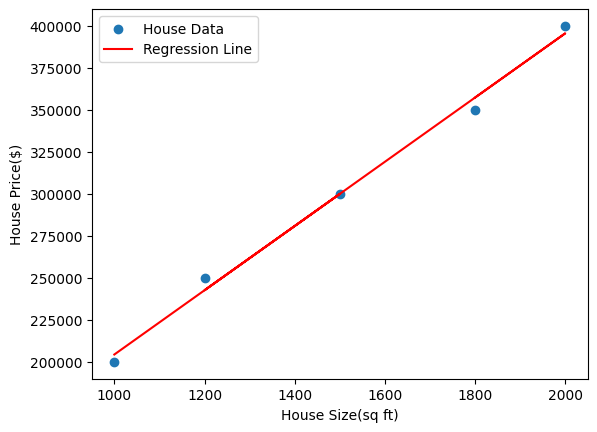

In [ ]:
plt.scatter(house_sizes, house_prices, label="House Data")
plt.plot(house_sizes, predicted_prices, color="red", label="Regression Line")
plt.xlabel("House Size(sq ft)")
plt.ylabel("House Price($)")
plt.legend()
plt.show()

In [ ]:
test_input = np.array([[3000]])
test_output = lr_model.predict(test_input)[0]
print(test_output)

[586764.70588235]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.010760938944785919
R-squared: 0.894653704451761


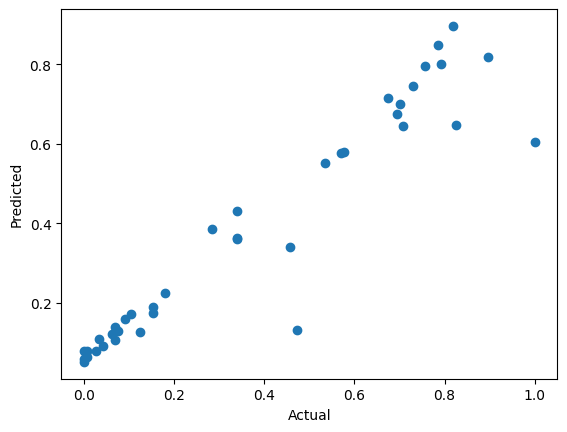

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
result_df = pd.DataFrame(columns=["Model", "Metric", "Value"])
result_df.loc[len(result_df)] = ["Linear Regression", "MSE", mse]
result_df.loc[len(result_df)] = ["Linear Regression", "R2", r2]
result_df

,Model,Metric,Value
0,Linear Regression,MSE,0.010761
1,Linear Regression,R2,0.894654
